<a href="https://colab.research.google.com/github/MiHarsh/ML-LIBRARY-1/blob/master/Copy_of_Neural_Network_2_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#IMPORTING IMPORTANT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [0]:
#IMPORTING DATASET
df=pd.read_csv("/content/sample_data/mnist_train_small.csv")
df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df.describe()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
count,19999.000000,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.000000,19999.000000,19999.000000,19999.000000,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,...,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.0,19999.0,19999.0,19999.0
mean,4.470124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000500,0.010801,0.010801,0.000450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012401,0.028451,0.058303,0.065503,0.127556,...,3.714036,2.627231,1.718486,1.020101,0.553228,0.247412,0.097755,0.020751,0.001400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000350,0.010651,0.036052,0.088304,0.112306,0.158508,0.276914,0.406070,0.546827,0.572079,0.696235,0.671684,0.545927,0.366318,0.215011,0.087704,0.036502,0.013651,0.032602,0.006000,0.0,0.0,0.0,0.0
std,2.892807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070712,1.527389,1.527389,0.063641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.233369,1.986589,3.473328,3.100786,5.003077,...,26.815104,22.334578,18.262801,14.000786,10.463422,6.750766,4.079112,1.322117,0.197995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049499,1.095106,2.220820,3.900144,4.749952,5.406774,7.005300,8.719149,10.379141,10.254843,11.457391,11.297264,10.057330,8.255546,6.314821,3.921664,2.712527,0.950818,2.718102,0.600333,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.

In [0]:
x=df.drop(["6"],axis=1)


In [0]:
y=df["6"]

In [0]:
np.random.seed(123)

In [0]:
#NORMALISING 
def feature_normalize(X):
    mean=np.array(np.mean(X,axis=1)).reshape(X.shape[0],1)
    std=np.array(np.std(X,axis=1)).reshape(X.shape[0],1)
    normalized=(X-mean)/(std+1e-7)
    return normalized

In [0]:
x=feature_normalize(x)

In [0]:
N=len(y)
num_features=x.shape[1]


In [0]:
#HYPOTHESIS WITH INBUILT SIGMOID FOR FORWARD PROPAGATION
def relu(X):
  return np.maximum(X,0)
def softmax_out(theta,arr,bias):
  mul=np.exp(np.dot(arr,theta)+bias)
  suma=np.sum(mul,axis=1).reshape(mul.shape[0],1)
  return mul/suma

In [0]:
def loss(h,W1,W2,y,reg):
  loss=0
  loss -= np.sum(np.log(out[np.arange(len(y)), y]))
  loss += 0.5 * reg * (np.sum(W1**2) + np.sum(W2**2))
  return loss/len(y)

In [0]:
params={}
num_hidden=40
num_out=10
params['W1']=np.random.rand(num_features,num_hidden)*0.001
params['W2']=np.random.rand(num_hidden,num_out)*0.001
params['b1']=np.random.randint(1)
params['b2']=np.random.randint(1)



In [0]:
def forward_relu(arr1,arr2,bias):
  return relu(np.dot(arr1,arr2)+bias)
def forward_softmax(theta,arr,bias):
  return softmax_out(arr,theta,bias)

In [0]:
#LOOP FOR UPDATING THE PARAMETERS
cost=[]
z=0
num_iter=6000
batch_size=500
lr=0.001
reg=0.25
for i in range(num_iter):
  l=0
  W1=params['W1']
  W2=params['W2']
  b1=params['b1']
  b2=params['b2']
  for j in range(X.shape[0]//batch_size):#USE 500 EXAMPLES AT A TIME AND UPDATE
    X1=x[l:l+batch_size]
    Y1=y[l:l+batch_size]
    f1=forward_relu(X1,W1,b1)
    out=forward_softmax(f1,W2,b2)
    Dout=np.copy(out)
    Dout[np.arange(len(Y1)),Y1]-=1
    dz = np.dot(Dout, W2.T) * (f1 > 0)  # (N, H)

    #Gradients
    grads={}
    grads['W2']=np.dot(f1.T,Dout)/batch_size
    grads['W1'] = np.dot(X1.T, dz) /batch_size  
    grads['b2'] = np.sum(Dout, axis=0) /batch_size
    grads['b1'] = np.sum(dz, axis=0) / batch_size
    #UPDATING PARAMETERS
    params['W2']-=lr*grads['W2']
    params['b2']-=lr*grads['b2']
    params['W1']-=lr*grads['W1']
    params['b1']-=lr*grads['b1']
    l+=batch_size  #INCREMENT IN VALUE OF L 
    z+=1
    cost.append(loss(out,W1,W2,Y1,reg))
  if i%50==0:
    print(f'i={i},cost={cost[i]}')
    

i=0,cost=0.0017966434288619584
i=50,cost=0.0021312183951284597
i=100,cost=0.002125995270157886
i=150,cost=0.0018064005463631924
i=200,cost=0.002125246234774835
i=250,cost=0.0017989512691785749
i=300,cost=0.001999196477975067
i=350,cost=0.002059627861746152
i=400,cost=0.0018602418308425904
i=450,cost=0.001624690517679701
i=500,cost=0.0017025920229497146
i=550,cost=0.002337034981490154
i=600,cost=0.0015173099996608403
i=650,cost=0.0018959063048429457
i=700,cost=0.0019925018924323427


KeyboardInterrupt: ignored

Text(0, 0.5, 'Cost')

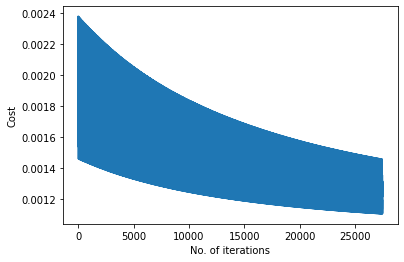

In [0]:
#Plotting Cost VS Iteration:
n_iterations = [x for x in range(1,z+1)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

In [0]:
cost

[0.0017966434288619584,
 0.001950967120273325,
 0.002024695724968402,
 0.0020233499450514857,
 0.002380459053793149,
 0.0021371693898543107,
 0.0017550134745709155,
 0.002086910834173689,
 0.0020835727455241057,
 0.0019124354736021175,
 0.0018823386073387913,
 0.002134354769453525,
 0.0020323050371643895,
 0.002029660636250711,
 0.0019802560400022564,
 0.0015374073244065407,
 0.0018096547955860976,
 0.0018060604493570923,
 0.0019082430832248769,
 0.0017552334710112987,
 0.0017219000610952453,
 0.001644065748689694,
 0.00213221753464684,
 0.0014591621757500735,
 0.0019046556556197847,
 0.0017751787219023893,
 0.0019294507500629983,
 0.002015754710139442,
 0.0017282500374237156,
 0.001995947356156786,
 0.0014865518450247097,
 0.0017223246729975781,
 0.0017228449860984417,
 0.0018129886640225249,
 0.0016995400429337655,
 0.0019527139311894986,
 0.0017034474278777821,
 0.002032807231548088,
 0.0020806694828004266,
 0.0017919481295391362,
 0.0019479237389965294,
 0.0020246608110236534,
 0.0

In [0]:
 #IMPORTING TESTSET
dft=pd.read_csv("/content/sample_data/mnist_test.csv")

In [0]:
x_test=dft.drop(["7"],axis=1)

In [0]:
y_test=dft["7"]

In [0]:
X_test=feature_normalize(x_test)


In [0]:
#cALCULATION OF PREDICTION
def predict(X_test):
  W1=params['W1']
  W2=params['W2']
  b1=params['b1']
  b2=params['b2']
  f1=forward_relu(X_test,W1,b1)
  out=forward_softmax(f1,W2,b2)
  return np.argmax(out,axis=1)

In [0]:
y_pred=predict(X_test)

In [0]:
len(y_pred)

9999

In [0]:

def accuracy(y_pred,y_test):
  count=0
  for i in range(len(y_test)):
    if y_pred[i]==y_test[i]:
      count+=1
  return (count/len(y_test))*100

In [0]:
accuracy(y_pred,y_test)

92.2092209220922

In [0]:
class TwoLayerNet(object):
    def __init__(self, input_size, hidden_size, output_size, std=1e-4):
        self.params = {}
        self.params['W1'] = std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    def loss(self, X, y=None, reg=0.0):
        num_features=X.shape[1]
        
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        N, D = X.shape
        z = np.dot(X, W1) + b1  # (N, num_hidden)
        h = np.maximum(z, 0)    # ReLU
        scores = np.dot(h , W2) + b2 
        if y is None:
            return scores
        loss = 0.0
        out = np.exp(scores)      # (N, C)
        out /= np.sum(out, axis=1).reshape(N, 1)
        # compute softmax loss
        loss -= np.sum(np.log(out[np.arange(N), y]))#log loss-->-yilog(yi_hat)
        loss /= N
        loss += 0.5 * reg * (np.sum(W1**2) + np.sum(W2**2))
        grads = {}
        # back propagation
        dout = np.copy(out)  # (N, C)
        dout[np.arange(N), y] -= 1
        dh = np.dot(dout, W2.T)
        dz = np.dot(dout, W2.T) * (z > 0)  # (N, H)
    
        # compute gradient for parameters
        grads['W2'] = np.dot(h.T, dout) / N      # (H, C)
        grads['b2'] = np.sum(dout, axis=0) / N      # (C,)
        grads['W1'] = np.dot(X.T, dz) / N        # (D, H)
        grads['b1'] = np.sum(dz, axis=0) / N       # (H,)
    
        # add reg term
        grads['W2'] += reg * W2
        grads['W1'] += reg * W1
        return loss, grads
    
    def train(self, X, y,
              learning_rate=1e-3, learning_rate_decay=0.95,
              reg=5e-6, num_iters=100,
              batch_size=200, verbose=False):
        num_train = X.shape[0]
        iterations_per_epoch = max(num_train / batch_size, 1)

        # Use SGD to optimize the parameters in self.model
        loss_history = []
        train_acc_history = []

        for it in range(num_iters):
            l=0
            for j in range(X.shape[0]//batch_size):#USE 500 EXAMPLES AT A TIME AND UPDATE
                
                X_batch=X[l:l+batch_size]
                y_batch=y[l:l+batch_size]
              
                # Compute loss and gradients using the current minibatch
                loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
                loss_history.append(loss)
                self.params['W2'] -= learning_rate * grads['W2']
                self.params['b2'] -= learning_rate * grads['b2']
                self.params['W1'] -= learning_rate * grads['W1']
                self.params['b1'] -= learning_rate * grads['b1']
                
                # Every epoch, check train and val accuracy and decay learning rate.
                # Decay learning rate
                learning_rate *= learning_rate_decay
                l+=batch_size
            if verbose and it % 100 == 0:
                print('iteration %d / %d: loss %f' % (it, num_iters, loss))
            if it % iterations_per_epoch == 0:
                    # Check accuracy
                train_acc = (self.predict(X_batch) == y_batch).mean()
                train_acc_history.append(train_acc)
              

                
        return {
        'loss_history': loss_history,
        'train_acc_history': train_acc_history,
              }
    
    def predict(self, X):
        outpt=self.loss(X)
        y_pred=np.argmax(outpt,axis=1)
        return y_pred
    def accuracy(self,y_pred,y):
        return np.mean(y_pred==self.y)*100/self.len(y)



In [0]:
input_size = 28*28*1
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(x, y,
            num_iters=1000, batch_size=200,
            learning_rate=1e-2, learning_rate_decay=1,
            reg=0.25, verbose=True)

iteration 0 / 1000: loss 2.302063
iteration 100 / 1000: loss 1.322065
iteration 200 / 1000: loss 1.314925
iteration 300 / 1000: loss 1.309799
iteration 400 / 1000: loss 1.306028
iteration 500 / 1000: loss 1.303115
iteration 600 / 1000: loss 1.300856
iteration 700 / 1000: loss 1.298959
iteration 800 / 1000: loss 1.297329
iteration 900 / 1000: loss 1.295997


In [0]:
y_pred=net.predict(X_test)

In [0]:
np.mean(y_pred==y_test)*100

88.33883388338833